# Creating and manipulating monte carlo spectra using MITK-MSI

In this tutorial we will learn how to
1. create reflectance spectra from examplary tissues
2. how to analyse and visualize the created spectra
3. how to manipulate them

The MITK-MSI software provides a wrapper to the popular MCML approach to simulate how light travels through tissue. This wrapper can be found in mc/sim.py.
In this tutorial we will utilize our tissue model which uses this wrapper to create the reflectance spectra.

As a prerequisit, you need a MCML monte carlo simulation which uses the format specified [here](http://omlc.org/software/mc/).
I tested this software with the GPU accelerated version which can be found [here](https://code.google.com/archive/p/gpumcml/).

In [4]:
# 1.1 create spectra - setup simulation environment

# some necessary imports
import logging
import numpy as np
import os
# everything related to the simulation wrapper
from mc import sim
# the factories create batches (tissue samples) and suited tissue models
from mc import factories
# function which runs simulations for each wavelength
from mc.create_spectrum import create_spectrum

# Where does your monte carlo simulation executable resides in?
MCML_EXECUTABLE = "/home/wirkert/workspace/monteCarlo/gpumcml/fast-gpumcml/gpumcml.sm_20"
# The MCML needs a simulation input file, where shall it be created?
MCI_FILENAME = "./temp.mci"
# filename of the file with the simulation results. Well, due to a bug in GPUMCML will reside
# in the same folder as the MCML executable
MCO_FILENAME = "temp.mco"
# The wavelengths for which we want to run our simulation
WAVELENGTHS = np.arange(450, 720, 2) * 10 ** -9

# we want to create standard colonic tissue as specified in the IPCAI 2016 publication
# "Robust Near Real-Time Estimation of Physiological Parameters from Megapixel
# Multispectral Images with Inverse Monte Carlo and Random Forest Regression"
factory = factories.ColonMuscleMeanScatteringFactory()

# create a simulation wrapper
sim_wrapper = sim.SimWrapper()
# our simulation needs to know where the input file for the simulation
# shall resign (will be automatically created)
sim_wrapper.set_mci_filename(MCI_FILENAME)
# also it needs to know where the simulation executable shall lie in
sim_wrapper.set_mcml_executable(MCML_EXECUTABLE)

# create the tissue model
# it is responsible for writing the simulation input file
tissue_model = factory.create_tissue_model()
# tell it where the input file shall lie in
tissue_model.set_mci_filename(sim_wrapper.mci_filename)
# also set the output filename
tissue_model.set_mco_filename(MCO_FILENAME)
# tell it how much photons shall be simulated. Will be set to 10**6 by standard,
# this is just an example
tissue_model.set_nr_photons(10**6)

In [5]:
# 1.2 create spectra - create tissue samples for simulation

# setup batch with tissue instances which should be simulated
batch = factory.create_batch_to_simulate()
# we want to simulate ten tissue instances in this example
nr_samples = 10
df = batch.create_parameters(10)

# lets have a look at the dataframe. Each row corresponds to one tissue instance,
# each tissue instance is defined by various layers, which all have certain parameters
# like e.g. oxygenation (here sao2)
df

layer0                                                            layer1  \
        vhb      sao2        a_mie  b_mie         d     n         g       vhb   
0  0.060727  0.405108  2732.072167  1.286  0.000643  1.36  0.911375  0.012529   
1  0.008601  0.380418  2715.509993  1.286  0.000959  1.36  0.864808  0.075130   
2  0.092514  0.354746  1522.467374  1.286  0.000626  1.36  0.938954  0.010242   
3  0.014844  0.271838  1817.987790  1.286  0.000947  1.36  0.822284  0.098037   
4  0.051730  0.336171  1545.569179  1.286  0.000840  1.36  0.855278  0.054194   
5  0.033220  0.675550  2920.462296  1.286  0.000854  1.36  0.879755  0.052119   
6  0.042772  0.713138  2343.482296  1.286  0.001007  1.36  0.889161  0.052464   
7  0.055083  0.493522  2862.632265  1.286  0.000674  1.36  0.901605  0.011494   
8  0.033641  0.121889    10.000000  1.286  0.000716  1.36  0.942503  0.093615   
9  0.090767  0.933581  2049.898620  1.286  0.000914  1.36  0.900553  0.092938   

                            ...                                 layer2  \
       sao2        a_mie    ...            d     n         g       vhb   
0  0.405108  2239.618718    ...     0.000674  1.36  0.871536  0.044635   
1  0.380418  1480.405725    ...     0.000594  1.36  0.904884  0.007109   
2  0.354746  1089.628438    ...     0.000799  1.36  0.921668  0.080251   
3  0.271838  1214.562685    ...     0.000739  1.36  0.816509  0.061391   
4  0.336171  2574.712829    ...     0.000518  1.36  0.934114  0.070809   
5  0.675550  2121.255538    ...     0.000716  1.36  0.870148  0.017853   
6  0.713138  1494.564335    ...     0.000795  1.36  0.857640  0.000794   
7  0.493522   876.784363    ...     0.000730  1.36  0.847137  0.040634   
8  0.121889  2470.880600    ...     0.000738  1.36  0.824153  0.050557   
9  0.933581  2080.923970    ...     0.000626  1.36  0.859222  0.048168   

                                                           
       sao2        a_mie  b_mie         d     n         g  
0  0.405108  3870.245726  1.286  0.000518  1.38  0.854300  
1  0.380418  2532.045757  1.286  0.000457  1.38  0.828825  
2  0.354746  2374.918328  1.286  0.000410  1.38  0.846570  
3  0.271838   650.190139  1.286  0.000477  1.38  0.858360  
4  0.336171  3457.117633  1.286  0.000459  1.38  0.924634  
5  0.675550  2663.702101  1.286  0.000417  1.38  0.901358  
6  0.713138  1365.344192  1.286  0.000491  1.38  0.902503  
7  0.493522  2460.497781  1.286  0.000494  1.38  0.879252  
8  0.121889  1990.760622  1.286  0.000536  1.38  0.857569  
9  0.933581  2073.291693  1.286  0.000503  1.38  0.813647  

[10 rows x 21 columns]

In [7]:
# 1.3 create spectra - run simulation

# add reflectance column to dataframe
for w in WAVELENGTHS:
    df["reflectances", w] = np.NAN # the reflectances have not been calculated yet, thus set no nan

# for each instance in our batch
for i in range(df.shape[0]):
    # set the desired element in the dataframe to be simulated
    tissue_model.set_dataframe_row(df.loc[i, :])
    logging.info("running simulation " + str(i) + " for\n" +
                 str(tissue_model))
    reflectances = create_spectrum(tissue_model, sim_wrapper, WAVELENGTHS)
    # store in dataframe
    for r, w in zip(reflectances, WAVELENGTHS):
        df["reflectances", w][i] = r
        
# clean up temporarily created files
os.remove(MCI_FILENAME)
created_mco_file = os.path.join(os.path.split(MCML_EXECUTABLE)[0], MCO_FILENAME)
if os.path.isfile(created_mco_file):
    os.remove(created_mco_file)

# Hooray, finished,
# now our dataframe also contains reflectances for each tissue instance:
df["reflectances"]

,4.5e-07,4.52e-07,4.54e-07,4.56e-07,4.58e-07,4.6e-07,4.62e-07,4.64e-07,4.66e-07,4.68e-07,...,7e-07,7.02e-07,7.04e-07,7.06e-07,7.08e-07,7.1e-07,7.12e-07,7.14e-07,7.16e-07,7.18e-07
0,0.052139,0.075604,0.105583,0.117613,0.128199,0.137660,0.147927,0.154320,0.162327,0.170435,...,0.505471,0.506173,0.506923,0.508379,0.509661,0.509957,0.511044,0.511899,0.512353,0.513397
1,0.249317,0.294264,0.336788,0.349672,0.360439,0.368425,0.377414,0.382268,0.387558,0.393322,...,0.514512,0.514646,0.514554,0.515599,0.515551,0.515706,0.515688,0.515692,0.515558,0.515568
2,0.015135,0.024211,0.038433,0.044910,0.051130,0.056346,0.062850,0.067001,0.072242,0.077058,...,0.369385,0.370703,0.372229,0.373423,0.375172,0.375954,0.376863,0.377677,0.379136,0.380009
3,0.126252,0.165786,0.208991,0.221679,0.233692,0.241259,0.250605,0.255267,0.261180,0.265604,...,0.392249,0.393718,0.394732,0.395270,0.396005,0.396826,0.398016,0.398674,0.398748,0.399876
4,0.032156,0.048988,0.073223,0.082547,0.092055,0.099348,0.107670,0.112801,0.118988,0.125407,...,0.435080,0.436994,0.439287,0.440044,0.441715,0.442364,0.443499,0.444120,0.446017,0.447964
5,0.114718,0.138649,0.164083,0.175158,0.183507,0.192087,0.201838,0.206713,0.215729,0.222988,...,0.532057,0.531468,0.531926,0.531250,0.532234,0.531852,0.531362,0.531587,0.531800,0.531074
6,0.075428,0.092161,0.111252,0.120155,0.126419,0.133840,0.141624,0.146338,0.153872,0.160242,...,0.491204,0.491536,0.491277,0.491265,0.491106,0.490230,0.490610,0.490270,0.490565,0.490454
7,0.062895,0.086219,0.114160,0.125318,0.134272,0.142476,0.152179,0.157698,0.165529,0.172328,...,0.460213,0.461519,0.462544,0.462657,0.463183,0.462922,0.463642,0.463763,0.464488,0.464716
8,0.002687,0.009663,0.027088,0.034975,0.043935,0.050369,0.058389,0.063868,0.069380,0.074805,...,0.335355,0.337836,0.339730,0.342233,0.344490,0.346606,0.348375,0.350101,0.351822,0.353292
9,0.032634,0.036502,0.041451,0.045510,0.047463,0.050845,0.054574,0.056508,0.060603,0.064730,...,0.484122,0.483369,0.482663,0.482151,0.480324,0.479257,0.478852,0.478074,0.477372,0.475579


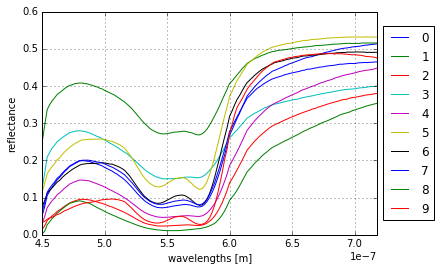

In [8]:
# 2.1 analyse spectra - plot reflectances

# the usual settings for plotting in ipython notebooks
import matplotlib.pylab as plt
%matplotlib inline

# let's have a look at our reflectances
df["reflectances"].T.plot(kind="line")
plt.ylabel("reflectance")
plt.xlabel("wavelengths [m]")
# put legend outside of plot
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

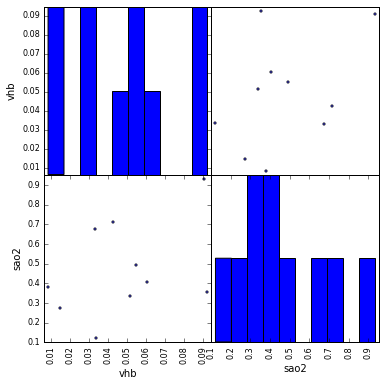

In [14]:
# 2.1 analyse spectra - show distribution of blood volume fraction (vhb) and sao2

# now we need some special pandas functions
import pandas as pd

# we're interested in the distribution of vhb and sao2 in the first layer (layer0)
df_vhb_sao2 = df["layer0"][["vhb", "sao2"]]
# plot a scatter matrix showing the distribution of vhb and sao2.
# of course, with this little data this does not really make sense,
# however it is a useful tool for analysis if much data is available
pd.tools.plotting.scatter_matrix(df_vhb_sao2, alpha=0.75, figsize=(6, 6))
plt.show()

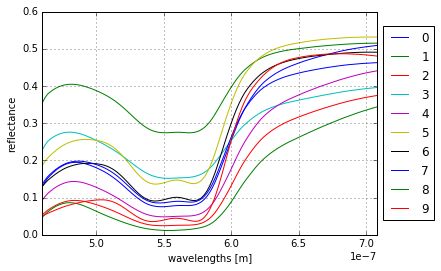

In [15]:
# 3.1 manipulate spectra - apply sliding average
# in 3.1 and 3.2 we will adapt the generated spectra to an imaginary imaging system
# This system has filters with 20nm bandwith (taken care of in 3.1)
# and takes multispectral images in 10nm steps (taken care of in 3.2)

# the module mc.dfmanipulations was written to provide some basic,
# often needed manipulations of the calculated spectra
# all dmfmanipulations are performed inplace, however, the df is also returned.
import mc.dfmanipulations as dfmani

# first copy to not loose our original data
df2 = df.copy()
# e.g. we cann apply a sliding average to our data. This is usefull if 
# we want to see e.g. how the reflectance was recorded by bands with a certain width
# a sliding average of 11 will take the five left and five right of the current reflectance
# and average. Because we take 2nm steps of reflectance in our simulation this means
# a 20nm window.
dfmani.fold_by_sliding_average(df2, 11)

# lets again plot the reflectances
df2["reflectances"].T.plot(kind="line")
plt.ylabel("reflectance")
plt.xlabel("wavelengths [m]")
# put legend outside of plot
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
# we can see that the bump at 560nm is "smoother"

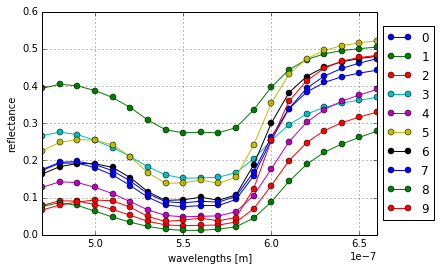

In [11]:
# 3.2 manipulate spectra - select certain wavelenghts

# our imaginary imaging system takes images in 10nm steps from 470 to 660nm
imaging_system_wavelengths = np.arange(470, 670, 10) * 10**-9

df3 = df2.copy()
dfmani.interpolate_wavelengths(df3, imaging_system_wavelengths)

# let's look at the newly created reflectances
df3["reflectances"].T.plot(kind="line", marker='o')
plt.ylabel("reflectance")
plt.xlabel("wavelengths [m]")
# put legend outside of plot
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

In [12]:
# that's it, folks, if you want, you can save the created dataframe easily to csv:
df.to_csv("results.csv", index=False)